In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import datetime as dt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from decimal import Decimal

In [2]:
df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])

In [3]:
df_allmatch

,ID,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRD,AwayRD
0,6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
1,6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500,1500,0,0
2,6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500,1500,0,0
3,6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
4,6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594,1560,4,-6
4586,20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1515,1524,9,-13
4587,20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7
4588,20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,8,0


In [4]:
df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats

,HomeShots,HomeShotsOnTarget,HomeShotsFromPK,HomePasses,HomeCrosses,HomeDirectFK,HomeIndirectFK,HomeCK,HomeThrowin,HomeDribbling,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
10011354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,20.0,6.8,0.0,494.8,17.8,11.8,2.0,6.8,23.4,12.2,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78
20340810,12.2,4.0,0.2,537.2,11.6,14.2,1.0,3.6,21.8,14.2,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
20343331,13.0,4.4,0.0,598.6,16.2,9.6,3.2,2.6,17.8,11.4,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20342218,9.0,4.4,0.0,379.8,8.4,13.8,1.2,3.6,18.8,11.4,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62


In [5]:
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)

In [6]:
df_recent_stats.sort_index(inplace=True)

df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)

In [7]:
df = pd.concat([df_allmatch, df_recent_stats], axis=1)
df = df.set_index("Date")
df.sort_index(inplace=True)
df

,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,2006,1,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
2020-12-19,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,2,埼玉,...,18.8,1.6,1.8,1.0,0.0,46.4,13.8,123.8,11.02,53.80
2020-12-19,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78


In [8]:
df.insert(8,"GoalDiff",df["HomeGF"]-df["AwayGF"])

In [9]:
df.insert(14, "RatingDiff", df["HomeRate"]-df["AwayRate"])

In [10]:
df

,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,GoalDiff,W/L,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,2006,1,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,1,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
2020-12-19,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,-2,2,...,18.8,1.6,1.8,1.0,0.0,46.4,13.8,123.8,11.02,53.80
2020-12-19,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,0,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78


In [11]:
df_past=df['2017':'2019']

In [12]:
df_past.columns

Index(['Year', 'Sec', 'Home', 'Away', 'HomeID', 'AwayID', 'HomeGF', 'AwayGF',
       'GoalDiff', 'W/L', 'Stadium', 'Attendances', 'HomeRate', 'AwayRate',
       'RatingDiff', 'HomeRD', 'AwayRD', 'HomeShots', 'HomeShotsOnTarget',
       'HomeShotsFromPK', 'HomePasses', 'HomeCrosses', 'HomeDirectFK',
       'HomeIndirectFK', 'HomeCK', 'HomeThrowin', 'HomeDribbling',
       'HomeTackles', 'HomeClearances', 'HomeIntercepts', 'HomeOffsides',
       'HomeYellowCards', 'HomeRedCards', 'Home30mLineEntries',
       'HomePenaltyAreaEntries', 'HomeAttacks', 'HomeChanceBuildingRate',
       'HomePossession', 'AwayShots', 'AwayShotsOnTarget', 'AwayShotsFromPK',
       'AwayPasses', 'AwayCrosses', 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK',
       'AwayThrowin', 'AwayDribbling', 'AwayTackles', 'AwayClearances',
       'AwayIntercepts', 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards',
       'Away30mLineEntries', 'AwayPenaltyAreaEntries', 'AwayAttacks',
       'AwayChanceBuildingRate', 'AwayPossess

In [13]:
X_train = df_past[[ 'RatingDiff','HomeRate','HomeRD','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayRate','AwayRD','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values

In [14]:
y_train = df_past["GoalDiff"].values

In [15]:
df_future = df['2020']

In [16]:
X_test=df_future[[ 'RatingDiff','HomeRate','HomeRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
         'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
         'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
         'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
         'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
          'HomePossession', 'AwayShots',
         'AwayRate','AwayRD','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
         'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
         'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
         'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
         'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values

In [17]:
y_test = df_future["GoalDiff"].values

In [18]:
reg = LinearRegression().fit(X_train, y_train)

In [19]:
y_pred = reg.predict(X_test)
y_pred 

array([-2.27136070e-01,  2.21475656e-02,  4.93996713e-01,  6.86229293e-01,
       -8.71800191e-02, -6.76750900e-01, -7.41586549e-02,  1.59340197e+00,
       -6.49728302e-02,  9.54533150e-01,  9.65685634e-01,  2.94098307e-01,
       -8.17848267e-02, -4.45933744e-01,  1.32555074e-01,  1.95552044e-01,
       -1.21762642e-02, -2.60195045e-01, -6.82921714e-01, -2.82635941e-02,
       -2.19379501e-01, -5.95153854e-01,  6.35842765e-01,  2.44360976e-01,
       -5.08405987e-01,  1.71782851e+00,  1.13991233e+00,  9.24547099e-01,
        3.87650828e-01, -3.41579973e-01,  5.32225713e-01, -3.44948771e-01,
       -5.87838736e-02,  4.69231527e-01, -6.17537583e-01,  3.08096830e-01,
       -5.13916993e-02, -4.56359679e-01,  1.58425771e-02,  1.80496278e+00,
        2.97933801e-01, -3.71453299e-01,  2.17456326e-01,  5.61746882e-01,
       -3.01683878e-01, -1.35848732e+00,  6.34477025e-02,  6.34411516e-01,
       -1.60494740e-01, -4.55383983e-01, -6.88489921e-01,  5.26667486e-01,
        2.10638779e+00, -

In [20]:
print([float(Decimal(i)) for i in y_pred ])

[-0.22713607007771694, 0.022147565644465725, 0.49399671344811125, 0.6862292925720244, -0.08718001907134396, -0.6767508996411599, -0.07415865485917111, 1.5934019659633956, -0.06497283023251935, 0.9545331504903862, 0.9656856340626724, 0.29409830698287964, -0.08178482671277174, -0.44593374373621164, 0.13255507413413725, 0.19555204442233337, -0.01217626418518683, -0.260195045387585, -0.6829217138854661, -0.02826359406657203, -0.21937950122218583, -0.5951538535102953, 0.6358427649136265, 0.24436097578780547, -0.50840598701779, 1.7178285092216214, 1.13991233436466, 0.9245470993599233, 0.3876508280498083, -0.34157997331683876, 0.5322257130992886, -0.3449487713579389, -0.05878387361156756, 0.4692315265509276, -0.617537583172817, 0.308096830216144, -0.05139169925201273, -0.4563596786455042, 0.015842577060002597, 1.8049627764400233, 0.29793380139157, -0.3714532988118102, 0.21745632550952404, 0.5617468816829881, -0.3016838783603397, -1.358487315760428, 0.06344770248242372, 0.6344115159146274, -0.

In [21]:
print(list(y_test))

[-1, 2, 1, 0, 0, -2, 3, 0, -1, -3, 2, 1, -1, -1, -1, -1, 0, -1, -4, -1, -1, -1, 2, -2, 0, 1, -2, 2, 0, 1, -2, -1, 0, -2, 0, 0, 0, -4, 2, 2, 1, -1, 1, 1, 2, -1, 0, -3, 0, 0, 1, 1, 4, -4, -2, 0, 2, -2, 2, 4, 2, 0, 0, -1, -1, -1, -1, -3, -2, -1, -1, 2, -1, 1, 4, 0, 2, 2, 1, 0, -2, 1, -5, 1, 1, 0, 2, 0, -1, 0, 1, 3, -1, -1, -2, 0, -1, 3, 1, 1, 2, 0, 0, -1, -1, 3, 0, 5, 0, 0, -1, 0, 1, -2, -1, -1, -2, 3, 3, 0, -3, -1, -2, -2, 0, 1, 0, 1, 3, 3, 2, 1, 1, -1, 0, -1, -1, -1, 4, 1, 1, -3, -1, -2, 3, -1, -2, -1, 0, -3, 1, -1, 1, 1, -3, 1, 2, 1, -2, 1, -1, 2, 1, -1, -2, 2, 4, -2, -1, -2, -1, 3, -1, 0, 1, -1, 0, 2, 3, -2, 1, -3, -1, -1, -1, -1, 1, 4, -1, 1, 1, 1, -1, -1, 1, 0, -2, 1, 0, -2, 0, 0, 3, 2, 3, 3, -1, 1, 1, 1, 0, 6, 1, -2, 1, 0, -4, 3, 1, 2, 1, 1, 0, 2, -1, -2, 1, 0, 0, -2, 0, 1, 1, -1, -2, 0, -1, 0, 2, 0, 1, -3, 2, 1, 1, 1, 4, 0, 0, -4, 2, 0, -2, 1, -1, 0, 2, -1, 4, -1, 2, 1, -2, -1, 5, -3, 0, -2, -1, -1, 0, 0, 0, 0, 4, 1, -2, 0, 0, -1, -2, -2, -1, 0, 0, 1, 0, 0, 0, 2, 0, -1, -1, -1, -1

In [22]:
pd.DataFrame([y_test,[round(i,2) for i in y_pred ]], index=["Actual","Prediction"])

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
Actual,-1.00,2.00,1.00,0.00,0.00,-2.00,3.00,0.00,-1.00,-3.00,...,-2.00,1.00,0.00,-1.00,2.00,1.00,-2.00,0.00,-2.00,0.00
Prediction,-0.23,0.02,0.49,0.69,-0.09,-0.68,-0.07,1.59,-0.06,0.95,...,0.18,-0.22,1.16,-0.75,0.07,0.22,-0.19,0.45,0.97,0.23


In [25]:
win_accurate_cou = 0
draw_accurate_cou = 0
lost_accurate_cou = 0

thresholds = []
accuracies = []

for threshold in np.arange(0,1,0.1):
    
    thresholds.append(threshold)
    win_accurate_cou = 0
    draw_accurate_cou = 0
    lost_accurate_cou = 0
    
    results_pred = []
    
    for t,p in zip(y_test, y_pred):

        if threshold < p :
            results_pred.append(1)
            if t > 0 :
                win_accurate_cou += 1

        elif threshold*(-1) < p and p < threshold :
            results_pred.append(0)
            if t == 0: 
                draw_accurate_cou += 1

        else:
            results_pred.append(2)
            if t < 0:
                lost_accurate_cou += 1
                
                
                
    accuracies.append((win_accurate_cou + draw_accurate_cou + lost_accurate_cou) / len(y_test))
    print(f"閾値 : {threshold:.1f} 的中率 : {(win_accurate_cou + draw_accurate_cou + lost_accurate_cou) / len(y_test):.3f}")

閾値 : 0.0 的中率 : 0.500
閾値 : 0.1 的中率 : 0.464
閾値 : 0.2 的中率 : 0.435
閾値 : 0.3 的中率 : 0.405
閾値 : 0.4 的中率 : 0.382
閾値 : 0.5 的中率 : 0.366
閾値 : 0.6 的中率 : 0.356
閾値 : 0.7 的中率 : 0.337
閾値 : 0.8 的中率 : 0.320
閾値 : 0.9 的中率 : 0.310


(-6.0, 6.0)

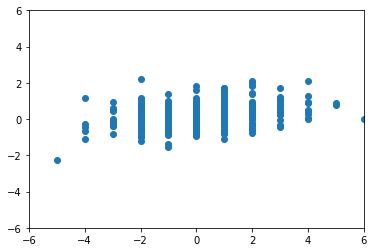

In [27]:
plt.scatter(y_test,y_pred)
plt.xlim(-6,6)
plt.ylim(-6,6)

(array([ 1.,  2.,  8., 18., 21., 31., 64., 50., 42., 28., 20., 10.,  6.,
         4.,  0.,  1.]),
 array([-5.14203114, -4.4462576 , -3.75048405, -3.05471051, -2.35893697,
        -1.66316342, -0.96738988, -0.27161634,  0.42415721,  1.11993075,
         1.81570429,  2.51147783,  3.20725138,  3.90302492,  4.59879846,
         5.29457201,  5.99034555]),
 <BarContainer object of 16 artists>)

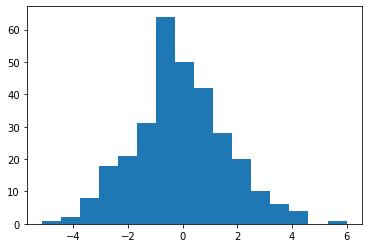

In [28]:
plt.hist(y_test-y_pred, bins=16 )

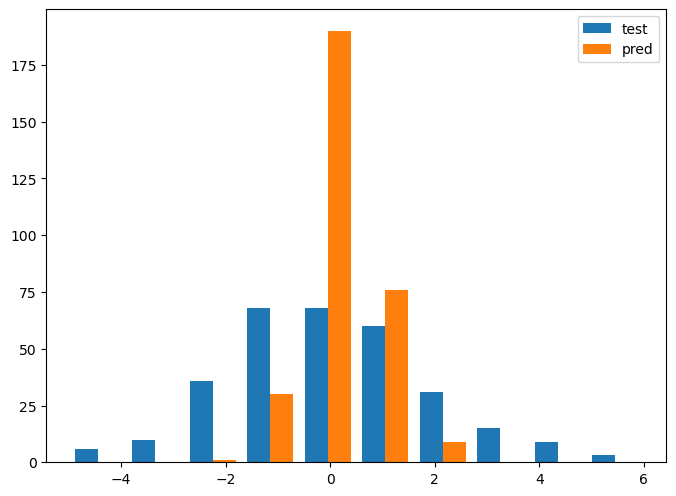

In [29]:
plt.figure(figsize=(8,6),dpi=100)
labels = ['test', 'pred']
plt.hist([y_test, y_pred], stacked=False, label=labels)
plt.legend()

### 線形回帰(LinerRegression)での得点差予測の考察

test(実際)に対して,pred(予測)は少ない点差のゲームを予測してしまう傾向にある｡ 予測で3~6点差のゲームを予測するのはほぼ無理｡

得点差の正負の判断(=勝敗判断)は引き分けを考慮していない状態で50%と悪くはない､､､｡ → ほとんどの試合で低点差ゲームを予測してしまうため､y_predの0を閾値として勝ち負けを判断する(引き分けを諦める)のが一番精度良い

分類問題より回帰問題として予測するほうがいいかもしれない､､｡